In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# параметри виведення 
pd.set_option("display.max_columns", 500) # кількість колонок
pd.set_option("display.max_rows", 1000) # кількість рядків
pd.set_option("display.max_colwidth", 300) # ширина колонок
pd.set_option("display.precision", 7) # кількість знаків після коми

# вимикаємо зайві попередження
import warnings
warnings.filterwarnings("ignore") 

# друк всіх результатів в одній комірці а не тільки останнього
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_excel('Data_AB.xlsx')
df.sample(10)
df.info()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
4730,4ffb0710301a33f4147727d04946957e,2023-06-03,US,control,0,0,NaN,0.0
13564,e29b7d7331e6ac2c7d9312d01e522cd1,2023-06-05,US,control,0,0,NaN,0.0
2799,2f8240f2313b1abd22544b4cc410e951,2023-06-05,CA,control,0,0,NaN,0.0
11111,b9a0a29e7c70ed7e76e7fd741b591945,2023-06-02,GB,control,1,0,monthly.5.99.3d.trial,0.0
13485,e134bbc3b1dcfaa005505d7cdf7fe729,2023-06-05,AU,treatment,0,0,NaN,0.0
4672,4f0f5318c45f557ab9c0966aaf0d4f90,2023-06-05,GB,control,0,0,NaN,0.0
6712,7098e9081627b423dfe99e8c49fe8744,2023-06-02,GB,control,0,0,NaN,0.0
3105,348aeb7cdbceb469ed754673969aab22,2023-06-06,US,control,0,0,NaN,0.0
5789,61df1558f9553548ead377e48b2908c9,2023-06-05,AU,control,0,0,NaN,0.0
11742,c42530867be603a27bdfcbe8ad4dd201,2023-06-01,GB,control,0,0,NaN,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15285 entries, 0 to 15284
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            15285 non-null  object        
 1   install_date       15285 non-null  datetime64[ns]
 2   country            15285 non-null  object        
 3   test_group         15285 non-null  object        
 4   trial              15285 non-null  int64         
 5   paid               15285 non-null  int64         
 6   subscription_name  1723 non-null   object        
 7   revenue_1m         15285 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 955.4+ KB


In [4]:
# Color palette
sns.set_palette('Set2')
sns.color_palette()

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Етап 1
Результати тесту:
1. Кількість користувачів в групах;
2. Кількість конверсій в групах;
3. Рівень конверсії в групах;
4. Дату початку та дату кінця тесту, а також тривалість тесту в днях (для перевірки).

In [22]:
# Кількість користувачів в групах control та treatment
user_counts = df['test_group'].value_counts()

# Кількість конверсій в групах control та treatment trial
conversion_counts_trial = df.groupby('test_group')['trial'].sum()

# Кількість конверсій в групах control та treatment paid
conversion_counts_paid = df.groupby('test_group')['paid'].sum()

# Рівень конверсії в групах control та treatment trial
conversion_rate_trial = df.groupby('test_group')['trial'].mean() * 100

# Рівень конверсії в групах control та treatment paid
conversion_rate_paid = df.groupby('test_group')['paid'].mean() * 100

# Дата початку та кінця тесту, а також тривалість тесту в днях
start_date = df['install_date'].min()
end_date = df['install_date'].max()
duration_in_days = (end_date - start_date).days + 1

# Виведення результатів
print(f"Number of users in groups:\n- Control: {user_counts['control']}\n- Treatment: {user_counts['treatment']}")
print("\n")
print(f"Number of conversions in groups trial:\n- Control: {conversion_counts_trial['control']}\n- Treatment: {conversion_counts_trial['treatment']}")
print(f"Number of conversions in groups paid:\n- Control: {conversion_counts_paid['control']}\n- Treatment: {conversion_counts_paid['treatment']}")
print("\n")
print(f"Conversion rate in groups trial:\n- Control: {conversion_rate_trial['control']:.2f}%\n- Treatment: {conversion_rate_trial['treatment']:.2f}%")
print(f"Conversion rate in groups paid:\n- Control: {conversion_rate_paid['control']:.2f}%\n- Treatment: {conversion_rate_paid['treatment']:.2f}%")
print("\n")
print(f"Test start date: {start_date}")
print(f"Test end date: {end_date}")
print(f"Test duration in days: {duration_in_days} days")


Number of users in groups:
- Control: 7627
- Treatment: 7658


Number of conversions in groups trial:
- Control: 925
- Treatment: 798
Number of conversions in groups paid:
- Control: 116
- Treatment: 149


Conversion rate in groups trial:
- Control: 12.13%
- Treatment: 10.42%
Conversion rate in groups paid:
- Control: 1.52%
- Treatment: 1.95%


Test start date: 2023-06-01 00:00:00
Test end date: 2023-06-07 00:00:00
Test duration in days: 7 days


# Етап 2
Статистичний аналіз:
1. Статистичний тест середнього значення revenue (t-тест);
2. Статистичний тест для конверсії в пробний період (Z-тест);
3. Статистичний тест для конверсії в платний період (Z-тест).

In [6]:
alpha = 0.05  # рівень значимості

In [7]:
# Підготовка даних для статистичних тестів
trial_data = df.pivot_table(index='user_id', columns='test_group', values='trial', aggfunc='first')
paid_data = df[df['trial'] == 1].pivot_table(index='user_id', columns='test_group', values='paid', aggfunc='first')
revenue_data = df.pivot_table(index='user_id', columns='test_group', values='revenue_1m', aggfunc='first')

# Проведення t-тесту для порівняння середнього ревеню між групами
t_stat, p_value_revenue = stats.ttest_ind(revenue_data['control'].dropna(), revenue_data['treatment'].dropna(), equal_var=False)

# Проведення Z-тесту (пропорційного тесту) для конверсій в пробний період і покупку після пробного періоду
from statsmodels.stats.proportion import proportions_ztest

# Конверсія в пробний період
count_trial = [trial_data['control'].sum(), trial_data['treatment'].sum()]
nobs_trial = [trial_data['control'].count(), trial_data['treatment'].count()]
z_stat_trial, p_value_trial = proportions_ztest(count_trial, nobs_trial)

# Конверсія в покупку після пробного періоду
count_paid = [paid_data['control'].sum(), paid_data['treatment'].sum()]
nobs_paid = [paid_data['control'].count(), paid_data['treatment'].count()]
z_stat_paid, p_value_paid = proportions_ztest(count_paid, nobs_paid)

print(f"The value for t-test for Average Revenue:\n- t-statistic = {t_stat:.4f},\n- p-value = {p_value_revenue:.4f}")
if p_value_revenue < alpha:
    print("The null hypothesis can be rejected: there is a statistically significant difference between the conversions of groups control and treatment.")
else:
    print("The null hypothesis cannot be rejected: there is insufficient evidence to support a statistically significant difference between the conversions of Groups control and treatment.")
print("\n")
print(f"The value for Z-test for Trial Conversion:\n- z-statistic = {z_stat_trial:.4f},\n- p-value = {p_value_trial:.4f}")
if p_value_trial < alpha:
    print("The null hypothesis can be rejected: there is a statistically significant difference between the conversions of groups control and treatment.")
else:
    print("The null hypothesis cannot be rejected: there is insufficient evidence to support a statistically significant difference between the conversions of Groups control and treatment.")
print("\n")
print(f"The value for Z-test for Paid Conversion:\n- z-statistic = {z_stat_paid:.4f},\n- p-value = {p_value_paid:.4f}")
if p_value_paid < alpha:
    print("The null hypothesis can be rejected: there is a statistically significant difference between the conversions of groups control and treatment.")
else:
    print("The null hypothesis cannot be rejected: there is insufficient evidence to support a statistically significant difference between the conversions of Groups control and treatment.")


The value for t-test for Average Revenue:
- t-statistic = -0.9772,
- p-value = 0.3285
The null hypothesis cannot be rejected: there is insufficient evidence to support a statistically significant difference between the conversions of Groups control and treatment.


The value for Z-test for Trial Conversion:
- z-statistic = 3.3375,
- p-value = 0.0008
The null hypothesis can be rejected: there is a statistically significant difference between the conversions of groups control and treatment.


The value for Z-test for Paid Conversion:
- z-statistic = -3.5177,
- p-value = 0.0004
The null hypothesis can be rejected: there is a statistically significant difference between the conversions of groups control and treatment.


# Етап 3
Візуалізація для порівняння середніх значень у групах з 95% довірчими інтервалами.

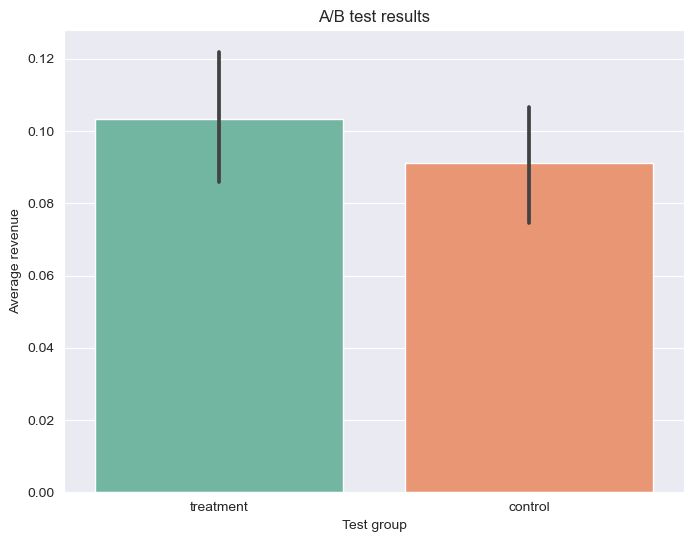

In [12]:
sns.set_style("darkgrid")

plt.figure(figsize=(8, 6))
sns.barplot(
    x='test_group', y='revenue_1m', data=df, ci=95
)

plt.title("A/B test results")
plt.xlabel("Test group")
plt.ylabel("Average revenue")

plt.show();

# Етап 4
Графік зміни конверсії в часі.

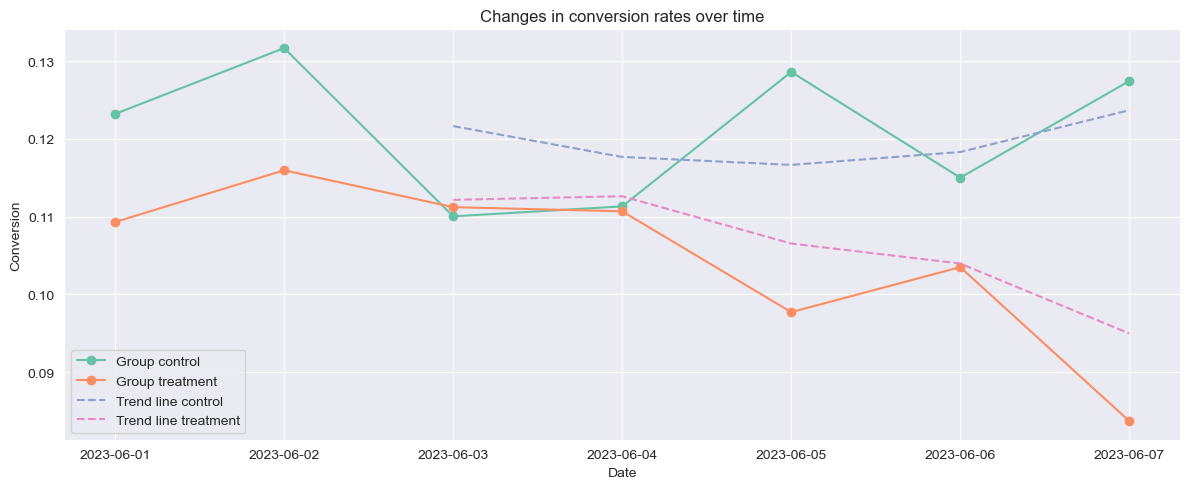

In [28]:
# Розділимо дані на дві групи за 'test_group'
group_control = df[df['test_group'] == 'control']
group_treatment = df[df['test_group'] == 'treatment']

# Ресемплюємо дані на денний рівень та обчислюємо конверсію для кожного дня
daily_conversion_control_trial = group_control.resample('D', on='install_date')['trial'].mean()
daily_conversion_treatment_trial = group_treatment.resample('D', on='install_date')['trial'].mean()

# Обчислюємо ковзне середнє для згладжування шумів та побудови лінії тренду для кожної групи, лінія Тренда
rolling_mean_control_trial = daily_conversion_control_trial.rolling(window=3).mean()
rolling_mean_treatment_trial = daily_conversion_treatment_trial.rolling(window=3).mean()

# Побудова графіка
plt.figure(figsize=(12, 5))
plt.plot(daily_conversion_control_trial.index, daily_conversion_control_trial.values, marker='o', linestyle='-', label='Group control')
plt.plot(daily_conversion_treatment_trial.index, daily_conversion_treatment_trial.values, marker='o', linestyle='-', label='Group treatment')
plt.plot(rolling_mean_control_trial.index, rolling_mean_control_trial.values, linestyle='--', label='Trend line control')
plt.plot(rolling_mean_treatment_trial.index, rolling_mean_treatment_trial.values, linestyle='--', label='Trend line treatment')
plt.title('Changes in conversion rates over time')
plt.xlabel('Date')
plt.ylabel('Conversion')
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show();

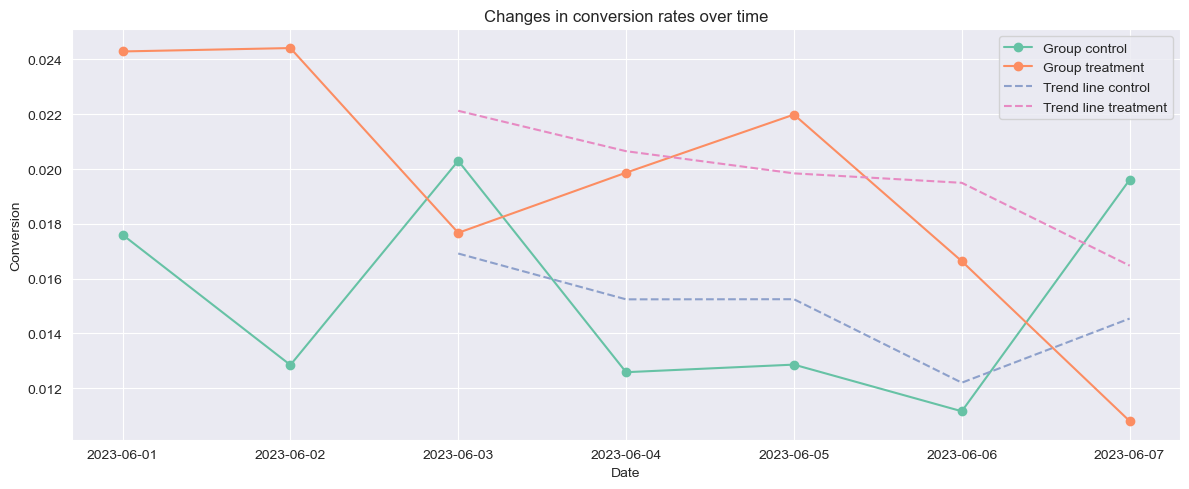

In [29]:
# Ресемплюємо дані на денний рівень та обчислюємо конверсію для кожного дня
daily_conversion_control_paid = group_control.resample('D', on='install_date')['paid'].mean()
daily_conversion_treatment_paid = group_treatment.resample('D', on='install_date')['paid'].mean()

# Обчислюємо ковзне середнє для згладжування шумів та побудови лінії тренду для кожної групи, лінія Тренда
rolling_mean_control_paid = daily_conversion_control_paid.rolling(window=3).mean()
rolling_mean_treatment_paid = daily_conversion_treatment_paid.rolling(window=3).mean()

# Побудова графіка
plt.figure(figsize=(12, 5))
plt.plot(daily_conversion_control_paid.index, daily_conversion_control_paid.values, marker='o', linestyle='-', label='Group control')
plt.plot(daily_conversion_treatment_paid.index, daily_conversion_treatment_paid.values, marker='o', linestyle='-', label='Group treatment')
plt.plot(rolling_mean_control_paid.index, rolling_mean_control_paid.values, linestyle='--', label='Trend line control')
plt.plot(rolling_mean_treatment_paid.index, rolling_mean_treatment_paid.values, linestyle='--', label='Trend line treatment')
plt.title('Changes in conversion rates over time')
plt.xlabel('Date')
plt.ylabel('Conversion')
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show();